In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json


from tqdm import tqdm_notebook
from tqdm.notebook import tqdm


https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html

## Load data

In [2]:
data = pd.read_csv('./lenta-ru-news.csv')

/var/folders/r6/p1q6kc2n6v3_8ngxkqrjvf580000gp/T/ipykernel_76194/1344384804.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./lenta-ru-news.csv')


In [3]:
data = data.dropna(subset=['text'], inplace=False)

In [4]:
data

,url,title,text,topic,tags,date
0,https://lenta.ru/news/1914/09/16/hungarnn/,1914. Русские войска вступили в пределы Венгрии,Бои у Сопоцкина и Друскеник закончились отступ...,Библиотека,Первая мировая,1914/09/16
1,https://lenta.ru/news/1914/09/16/lermontov/,1914. Празднование столетия М.Ю. Лермонтова от...,"Министерство народного просвещения, в виду про...",Библиотека,Первая мировая,1914/09/16
2,https://lenta.ru/news/1914/09/17/nesteroff/,1914. Das ist Nesteroff!,"Штабс-капитан П. Н. Нестеров на днях, увидев в...",Библиотека,Первая мировая,1914/09/17
3,https://lenta.ru/news/1914/09/17/bulldogn/,1914. Бульдог-гонец под Льежем,Фотограф-корреспондент Daily Mirror рассказыва...,Библиотека,Первая мировая,1914/09/17
4,https://lenta.ru/news/1914/09/18/zver/,1914. Под Люблином пойман швабский зверь,"Лица, приехавшие в Варшаву из Люблина, передаю...",Библиотека,Первая мировая,1914/09/18
...,...,...,...,...,...,...
800970,https://lenta.ru/news/2019/12/14/shnur/,Шнуров раскритиковал Гагарину на «Голосе»,Певец Сергей Шнуров раскритиковал свою коллегу...,NaN,ТВ и радио,2019/12/14
800971,https://lenta.ru/news/2019/12/14/dolg/,В России предложили изменить правила взыскания...,Министерство юстиции России предложило изменит...,NaN,Все,2019/12/14
800972,https://lenta.ru/news/2019/12/14/dark_euro/,В России назвали «черную дату» для Европы,Испытание США ранее запрещенной Договором о ли...,NaN,Политика,2019/12/14
800973,https://lenta.ru/news/2019/12/14/meteo/,Россиянам пообещали аномально теплую погоду,В ближайшие дни в европейской части России пог...,NaN,Общество,2019/12/14


In [5]:
import string # for work with strings
import nltk   # Natural Language Toolkit

In [6]:
# get russian stop words
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('russian')

[nltk_data] Downloading package stopwords to /Users/atsky/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# define word tokenizer
word_tokenizer = nltk.WordPunctTokenizer()

In [8]:
def process_data(data):
    texts = []

    for item in data:    
        text_lower = item.lower() # convert words in a text to lower case
        tokens     = word_tokenizer.tokenize(text_lower) # splits the text into tokens (words)
        
        # remove punct and stop words from tokens
        tokens = [word for word in tokens if (word not in string.punctuation and word not in stop_words)]
        
        texts.append(tokens) # collect the text tokens
    
    return texts

In [9]:
from sklearn.model_selection import train_test_split

original_texts, _ = train_test_split(data['text'].values, test_size=0.9, random_state=42)

In [10]:
# run tokenization and data cleaning
texts = process_data(original_texts)

In [11]:
from nltk.stem.snowball import SnowballStemmer 

# define stemmer
stemmer = SnowballStemmer("russian")

In [12]:
# ! pip install pymorphy2

In [13]:
import pymorphy2 # Морфологический анализатор

# define lemmatizer :)
morph = pymorphy2.MorphAnalyzer()

In [14]:
# apply stemming to all texts
for i in tqdm(range(len(texts))):                    # tqdm_notebook creates the process bar below :)
    text_stemmed = list(map(stemmer.stem, texts[i])) # apply stemming to each word in a text
    texts[i] = ' '.join(text_stemmed)                # unite all stemmed words into a new text

  0%|          | 0/80097 [00:00<?, ?it/s]

## Split into train and test

In [32]:
#train test_split
train_texts, test_texts = train_test_split(texts, test_size=0.33, random_state=42)

# Latent Semantic Analysis (LSA)

LSA is just similar to PCA. It reduces dimension of the input matrix X.

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

In [34]:
# Fit TF-IDF on train texts
vectorizer = TfidfVectorizer(max_features = 40000)
vectorizer.fit(train_texts)

TfidfVectorizer(max_features=40000)

In [35]:
# Apply TF-IDF to train and test texts
train_X = vectorizer.transform(train_texts)
test_X  = vectorizer.transform(test_texts)

In [19]:
train_X.shape

(53664, 40000)

In [20]:
from sklearn.decomposition import TruncatedSVD

# fit SVD decomposition
svd = TruncatedSVD(n_components = 1000)
svd.fit(train_X)

TruncatedSVD(n_components=1000)

In [21]:
# apply SVD to train and test samples
train_svd_X = svd.transform(train_X)
test_svd_X  = svd.transform(test_X)

In [22]:
train_svd_X.shape

(53664, 1000)

In [23]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

## NMF

In [24]:
nmf = NMF(n_components=10, random_state=1, alpha=0.1, l1_ratio=0.5, init='nndsvd').fit(train_X)

/Users/atsky/opt/anaconda3/envs/ml-course/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1422: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(


In [25]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

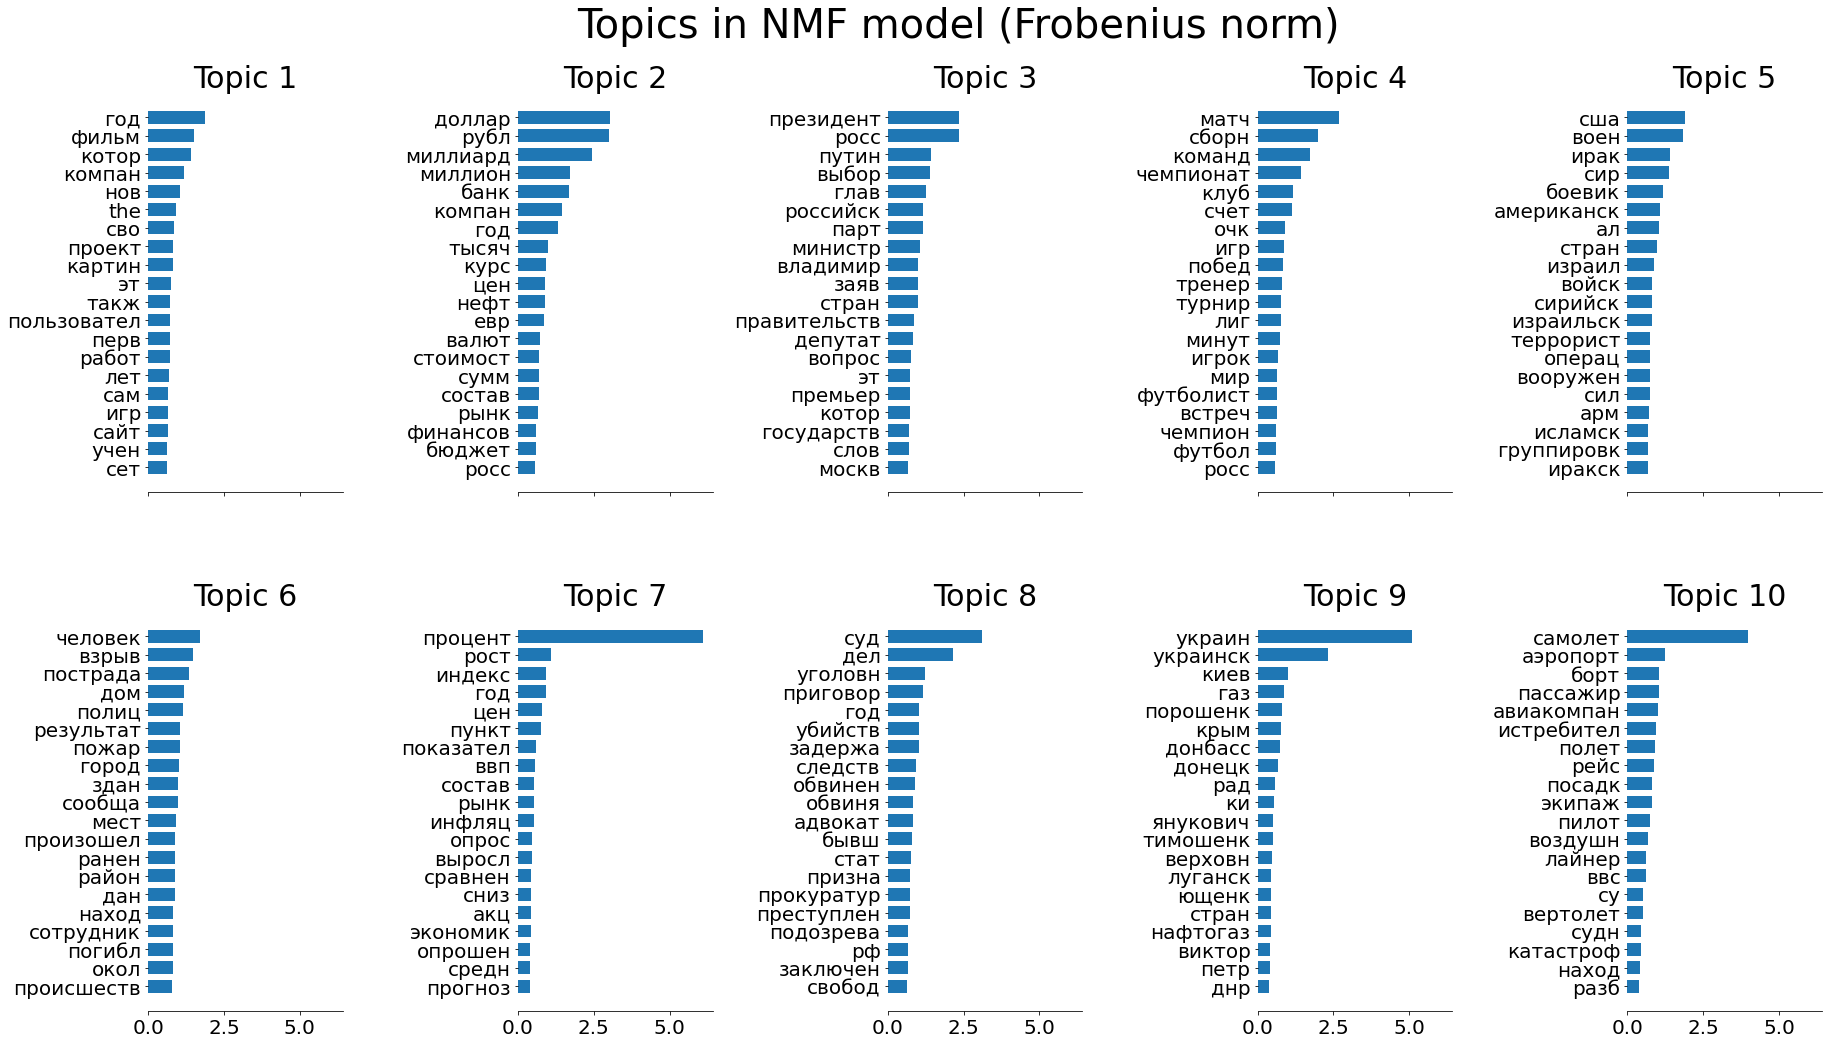

In [26]:
tfidf_feature_names = vectorizer.get_feature_names_out()
plot_top_words(
    nmf, tfidf_feature_names, 20, "Topics in NMF model (Frobenius norm)"
)

In [27]:
nmf = NMF(
    n_components=10,
    random_state=1,
    beta_loss="kullback-leibler",
    solver="mu",
    max_iter=1000,
    alpha=0.1,
    l1_ratio=0.5,
).fit(train_X)

/Users/atsky/opt/anaconda3/envs/ml-course/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1422: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/Users/atsky/opt/anaconda3/envs/ml-course/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


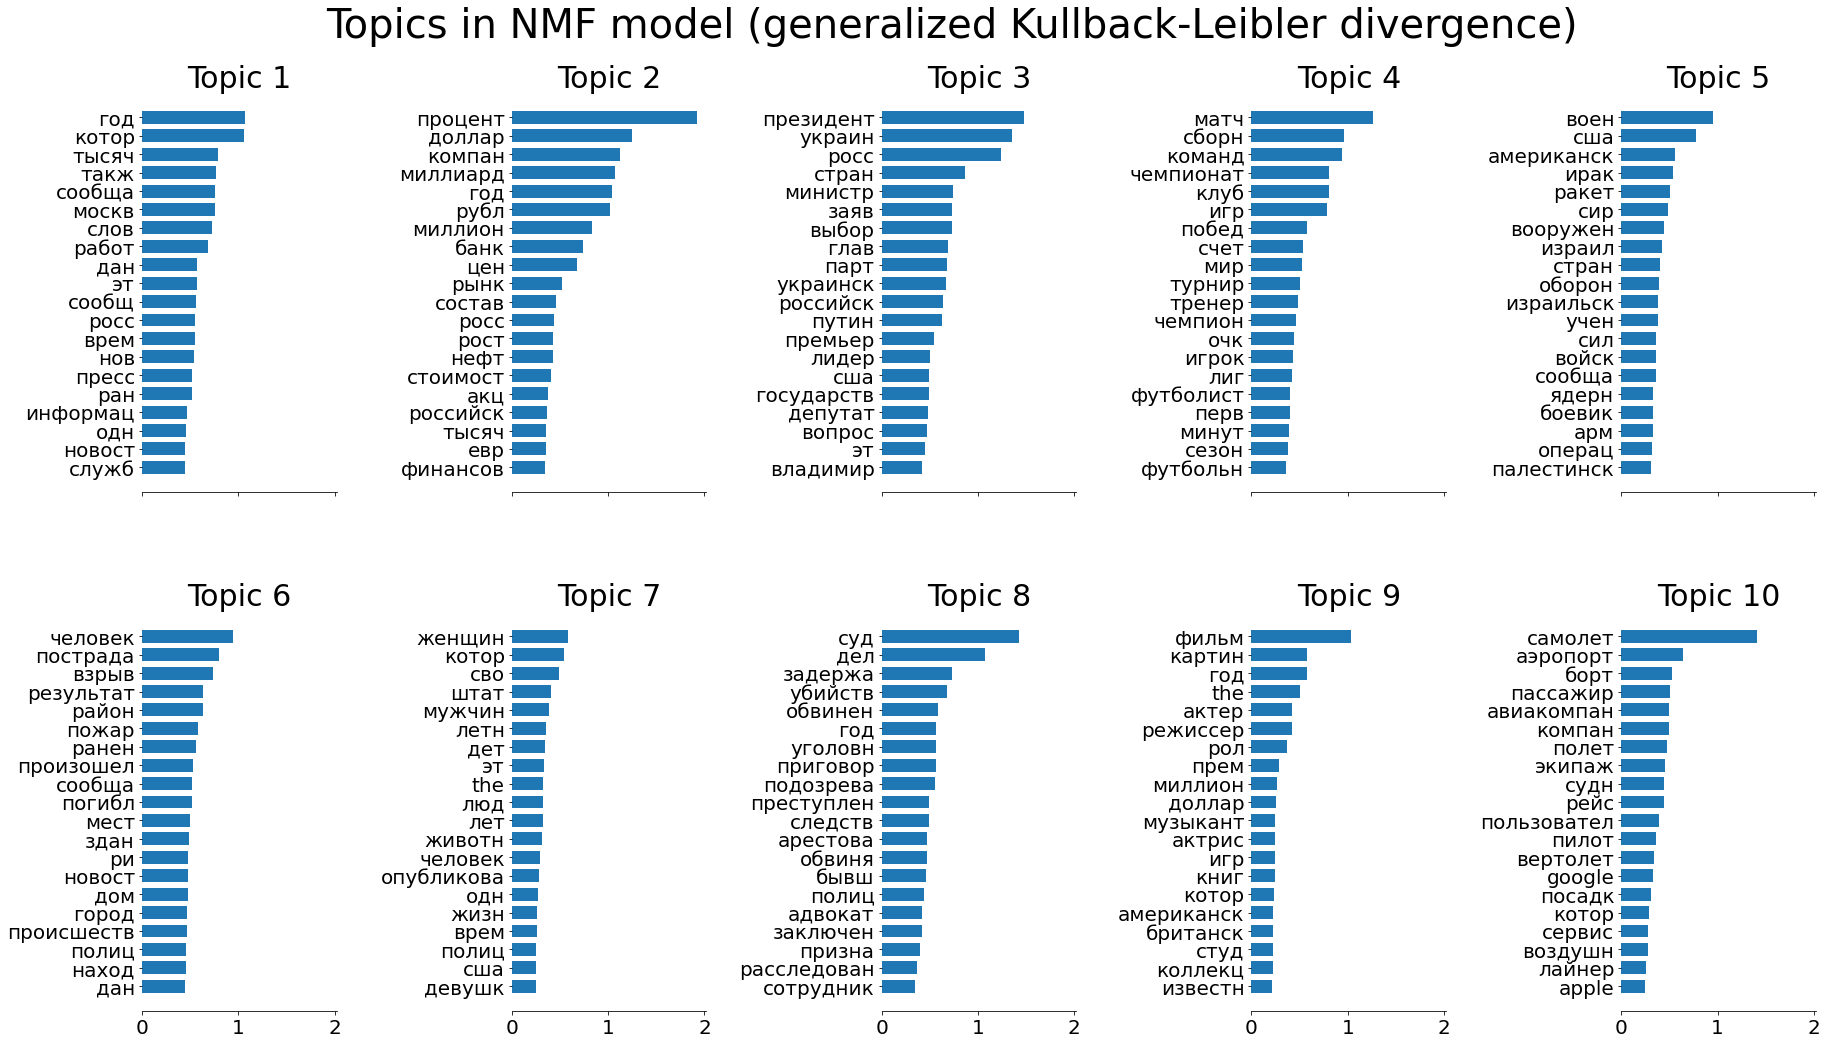

In [28]:
tfidf_feature_names = vectorizer.get_feature_names_out()
plot_top_words(
    nmf, tfidf_feature_names, 20, "Topics in NMF model (generalized Kullback-Leibler divergence)"
)

In [29]:
lda = LatentDirichletAllocation(
    n_components=10,
    max_iter=50,
    random_state=0,
)
lda.fit(train_X)

LatentDirichletAllocation(max_iter=50, random_state=0)

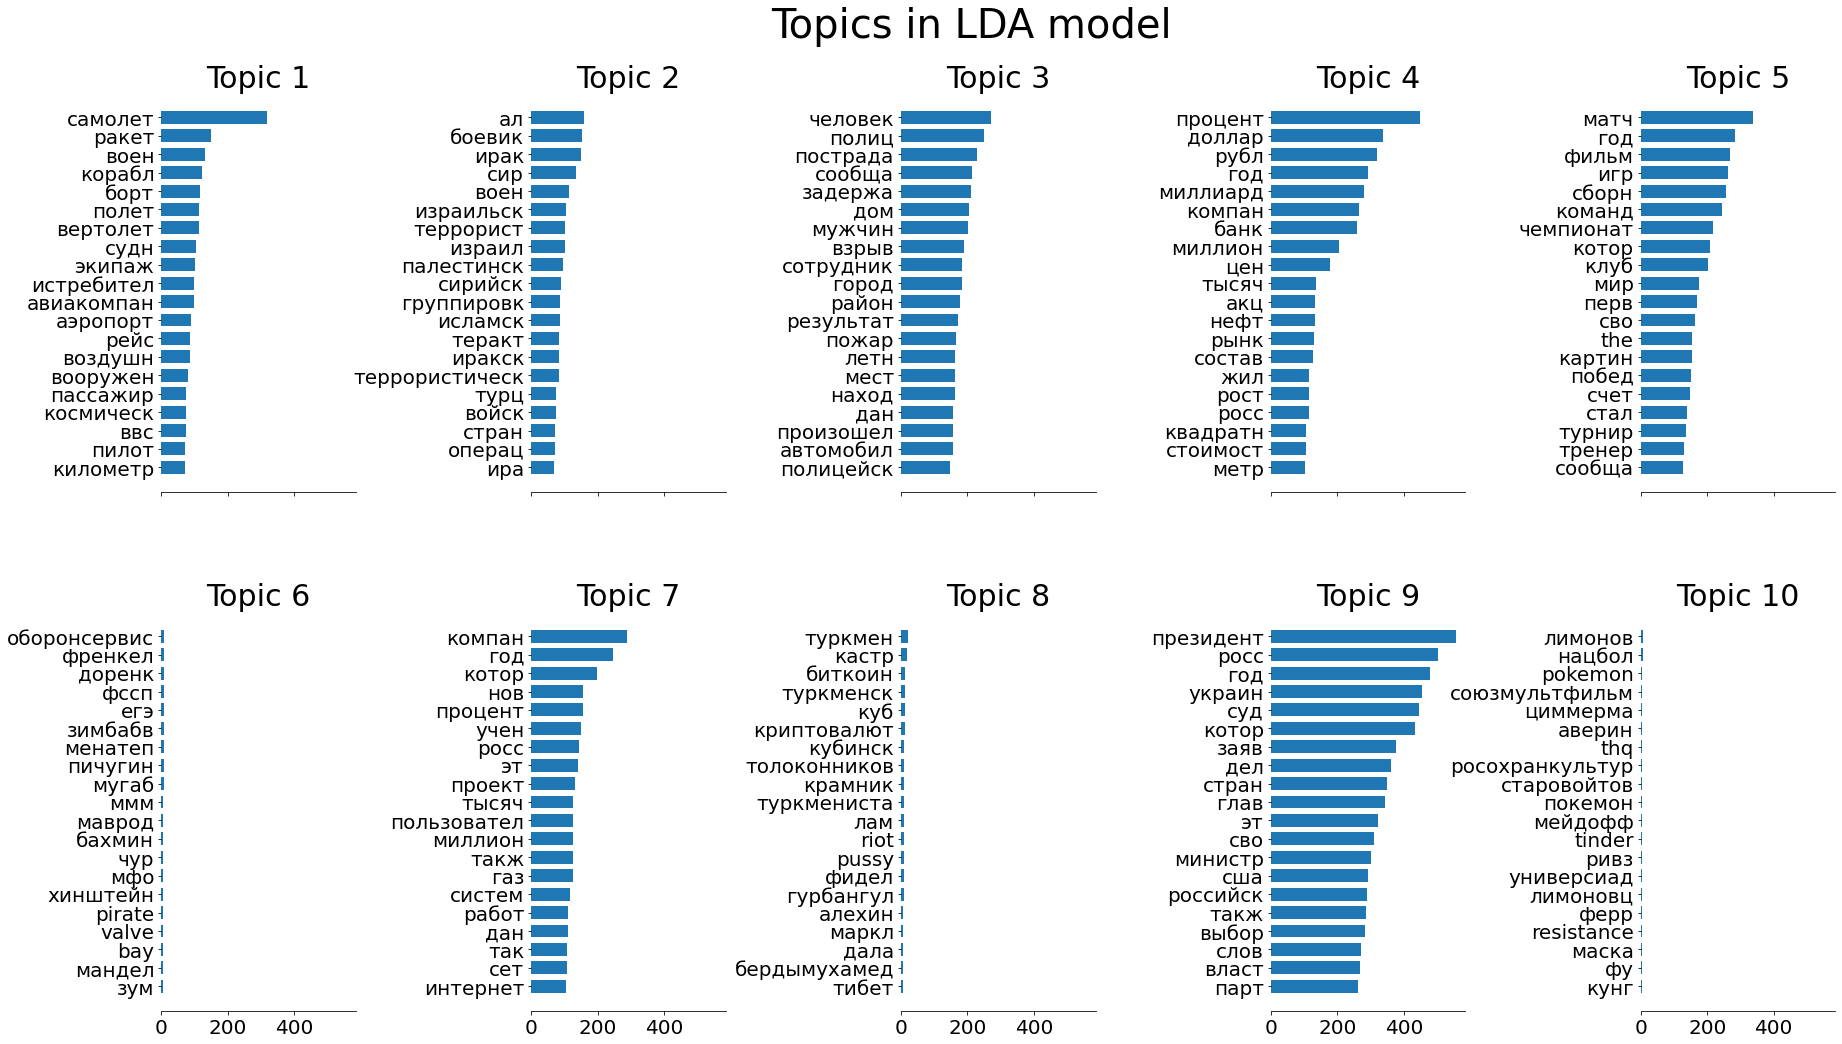

In [30]:
tfidf_feature_names = vectorizer.get_feature_names_out()
plot_top_words(
    lda, tfidf_feature_names, 20, "Topics in LDA model"
)

In [31]:
lda.transform(train_X)

array([[0.01274212, 0.01274056, 0.74705437, ..., 0.01273981, 0.01274291,
        0.01273981],
       [0.01235923, 0.11326942, 0.77594335, ..., 0.01235845, 0.02368062,
        0.01235841],
       [0.0118851 , 0.01188316, 0.02803199, ..., 0.01187575, 0.47370916,
        0.01187575],
       ...,
       [0.00756923, 0.00756883, 0.00759913, ..., 0.00756828, 0.00757003,
        0.00756828],
       [0.23134713, 0.32570903, 0.30492309, ..., 0.00953915, 0.08077547,
        0.00953915],
       [0.02111217, 0.0095441 , 0.03123109, ..., 0.00954766, 0.57854527,
        0.00951204]])

## Fit a classifier

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(train_svd_X, train_y)

### Evaluate on test data

In [ ]:
predict = model.predict(test_svd_X)
proba   = model.predict_proba(test_svd_X)

from sklearn.metrics import accuracy_score, roc_auc_score
print("ACCURACY = {}".format(accuracy_score(test_y, predict)))
print("ROC-AUC =  {}".format(roc_auc_score(test_y, proba[:, 1])))

# Kaggle competition

https://www.kaggle.com/c/explicit-content-detection